In [65]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
%matplotlib inline

## 1 `Loading the dataset`


In [66]:
import sklearn
print(sklearn.__version__)

1.5.2


In [67]:
from sklearn.datasets import fetch_california_housing

In [68]:
california = fetch_california_housing()
type(california)

sklearn.utils._bunch.Bunch

In [69]:
california.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'feature_names', 'DESCR'])

## 2 `Checking the description of the dataset`

In [70]:
print(california.DESCR)

.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

:Number of Instances: 20640

:Number of Attributes: 8 numeric, predictive attributes and the target

:Attribute Information:
    - MedInc        median income in block group
    - HouseAge      median house age in block group
    - AveRooms      average number of rooms per household
    - AveBedrms     average number of bedrooms per household
    - Population    block group population
    - AveOccup      average number of household members
    - Latitude      block group latitude
    - Longitude     block group longitude

:Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
https://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.html

The target variable is the median house value for California districts,
expressed in hundreds of thousands of dollars ($100,000).

This dataset was derived from the 1990 U.S. census, using one row per ce

In [71]:
print(california.data)

[[   8.3252       41.            6.98412698 ...    2.55555556
    37.88       -122.23      ]
 [   8.3014       21.            6.23813708 ...    2.10984183
    37.86       -122.22      ]
 [   7.2574       52.            8.28813559 ...    2.80225989
    37.85       -122.24      ]
 ...
 [   1.7          17.            5.20554273 ...    2.3256351
    39.43       -121.22      ]
 [   1.8672       18.            5.32951289 ...    2.12320917
    39.43       -121.32      ]
 [   2.3886       16.            5.25471698 ...    2.61698113
    39.37       -121.24      ]]


In [72]:
print(california.target)

[4.526 3.585 3.521 ... 0.923 0.847 0.894]


In [73]:
print(california.feature_names)

['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup', 'Latitude', 'Longitude']


## 3 `Preparing the dataset`

In [74]:
dataset=pd.DataFrame(california.data,columns=california.feature_names)
dataset.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


In [75]:
# dataset['Price'] = california.target
dataset['price'] = pd.DataFrame(california.target)

In [76]:
dataset

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,price
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422
...,...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09,0.781
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21,0.771
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22,0.923
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32,0.847


In [77]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   MedInc      20640 non-null  float64
 1   HouseAge    20640 non-null  float64
 2   AveRooms    20640 non-null  float64
 3   AveBedrms   20640 non-null  float64
 4   Population  20640 non-null  float64
 5   AveOccup    20640 non-null  float64
 6   Latitude    20640 non-null  float64
 7   Longitude   20640 non-null  float64
 8   price       20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB


### 3.1 `Summarizing the stats of the dataset`

In [78]:
dataset.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,price
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704,2.068558
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532,1.153956
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000,0.149990
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000,1.196000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000,1.797000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000,2.647250
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000,5.000010


### 3.2 `Checking the missing values`

In [79]:
dataset.isnull().sum()

MedInc        0
HouseAge      0
AveRooms      0
AveBedrms     0
Population    0
AveOccup      0
Latitude      0
Longitude     0
price         0
dtype: int64

## 4 `Exploratory Data Analysis`


### 4.1 `Correlation`

In [80]:
dataset.corr()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,price
MedInc,1.000000,-0.119034,0.326895,-0.062040,0.004834,0.018766,-0.079809,-0.015176,0.688075
HouseAge,-0.119034,1.000000,-0.153277,-0.077747,-0.296244,0.013191,0.011173,-0.108197,0.105623
AveRooms,0.326895,-0.153277,1.000000,0.847621,-0.072213,-0.004852,0.106389,-0.027540,0.151948
AveBedrms,-0.062040,-0.077747,0.847621,1.000000,-0.066197,-0.006181,0.069721,0.013344,-0.046701
Population,0.004834,-0.296244,-0.072213,-0.066197,1.000000,0.069863,-0.108785,0.099773,-0.024650
AveOccup,0.018766,0.013191,-0.004852,-0.006181,0.069863,1.000000,0.002366,0.002476,-0.023737
Latitude,-0.079809,0.011173,0.106389,0.069721,-0.108785,0.002366,1.000000,-0.924664,-0.144160
Longitude,-0.015176,-0.108197,-0.027540,0.013344,0.099773,0.002476,-0.924664,1.000000,-0.045967
price,0.688075,0.105623,0.151948,-0.046701,-0.024650,-0.023737,-0.144160,-0.045967,1.000000


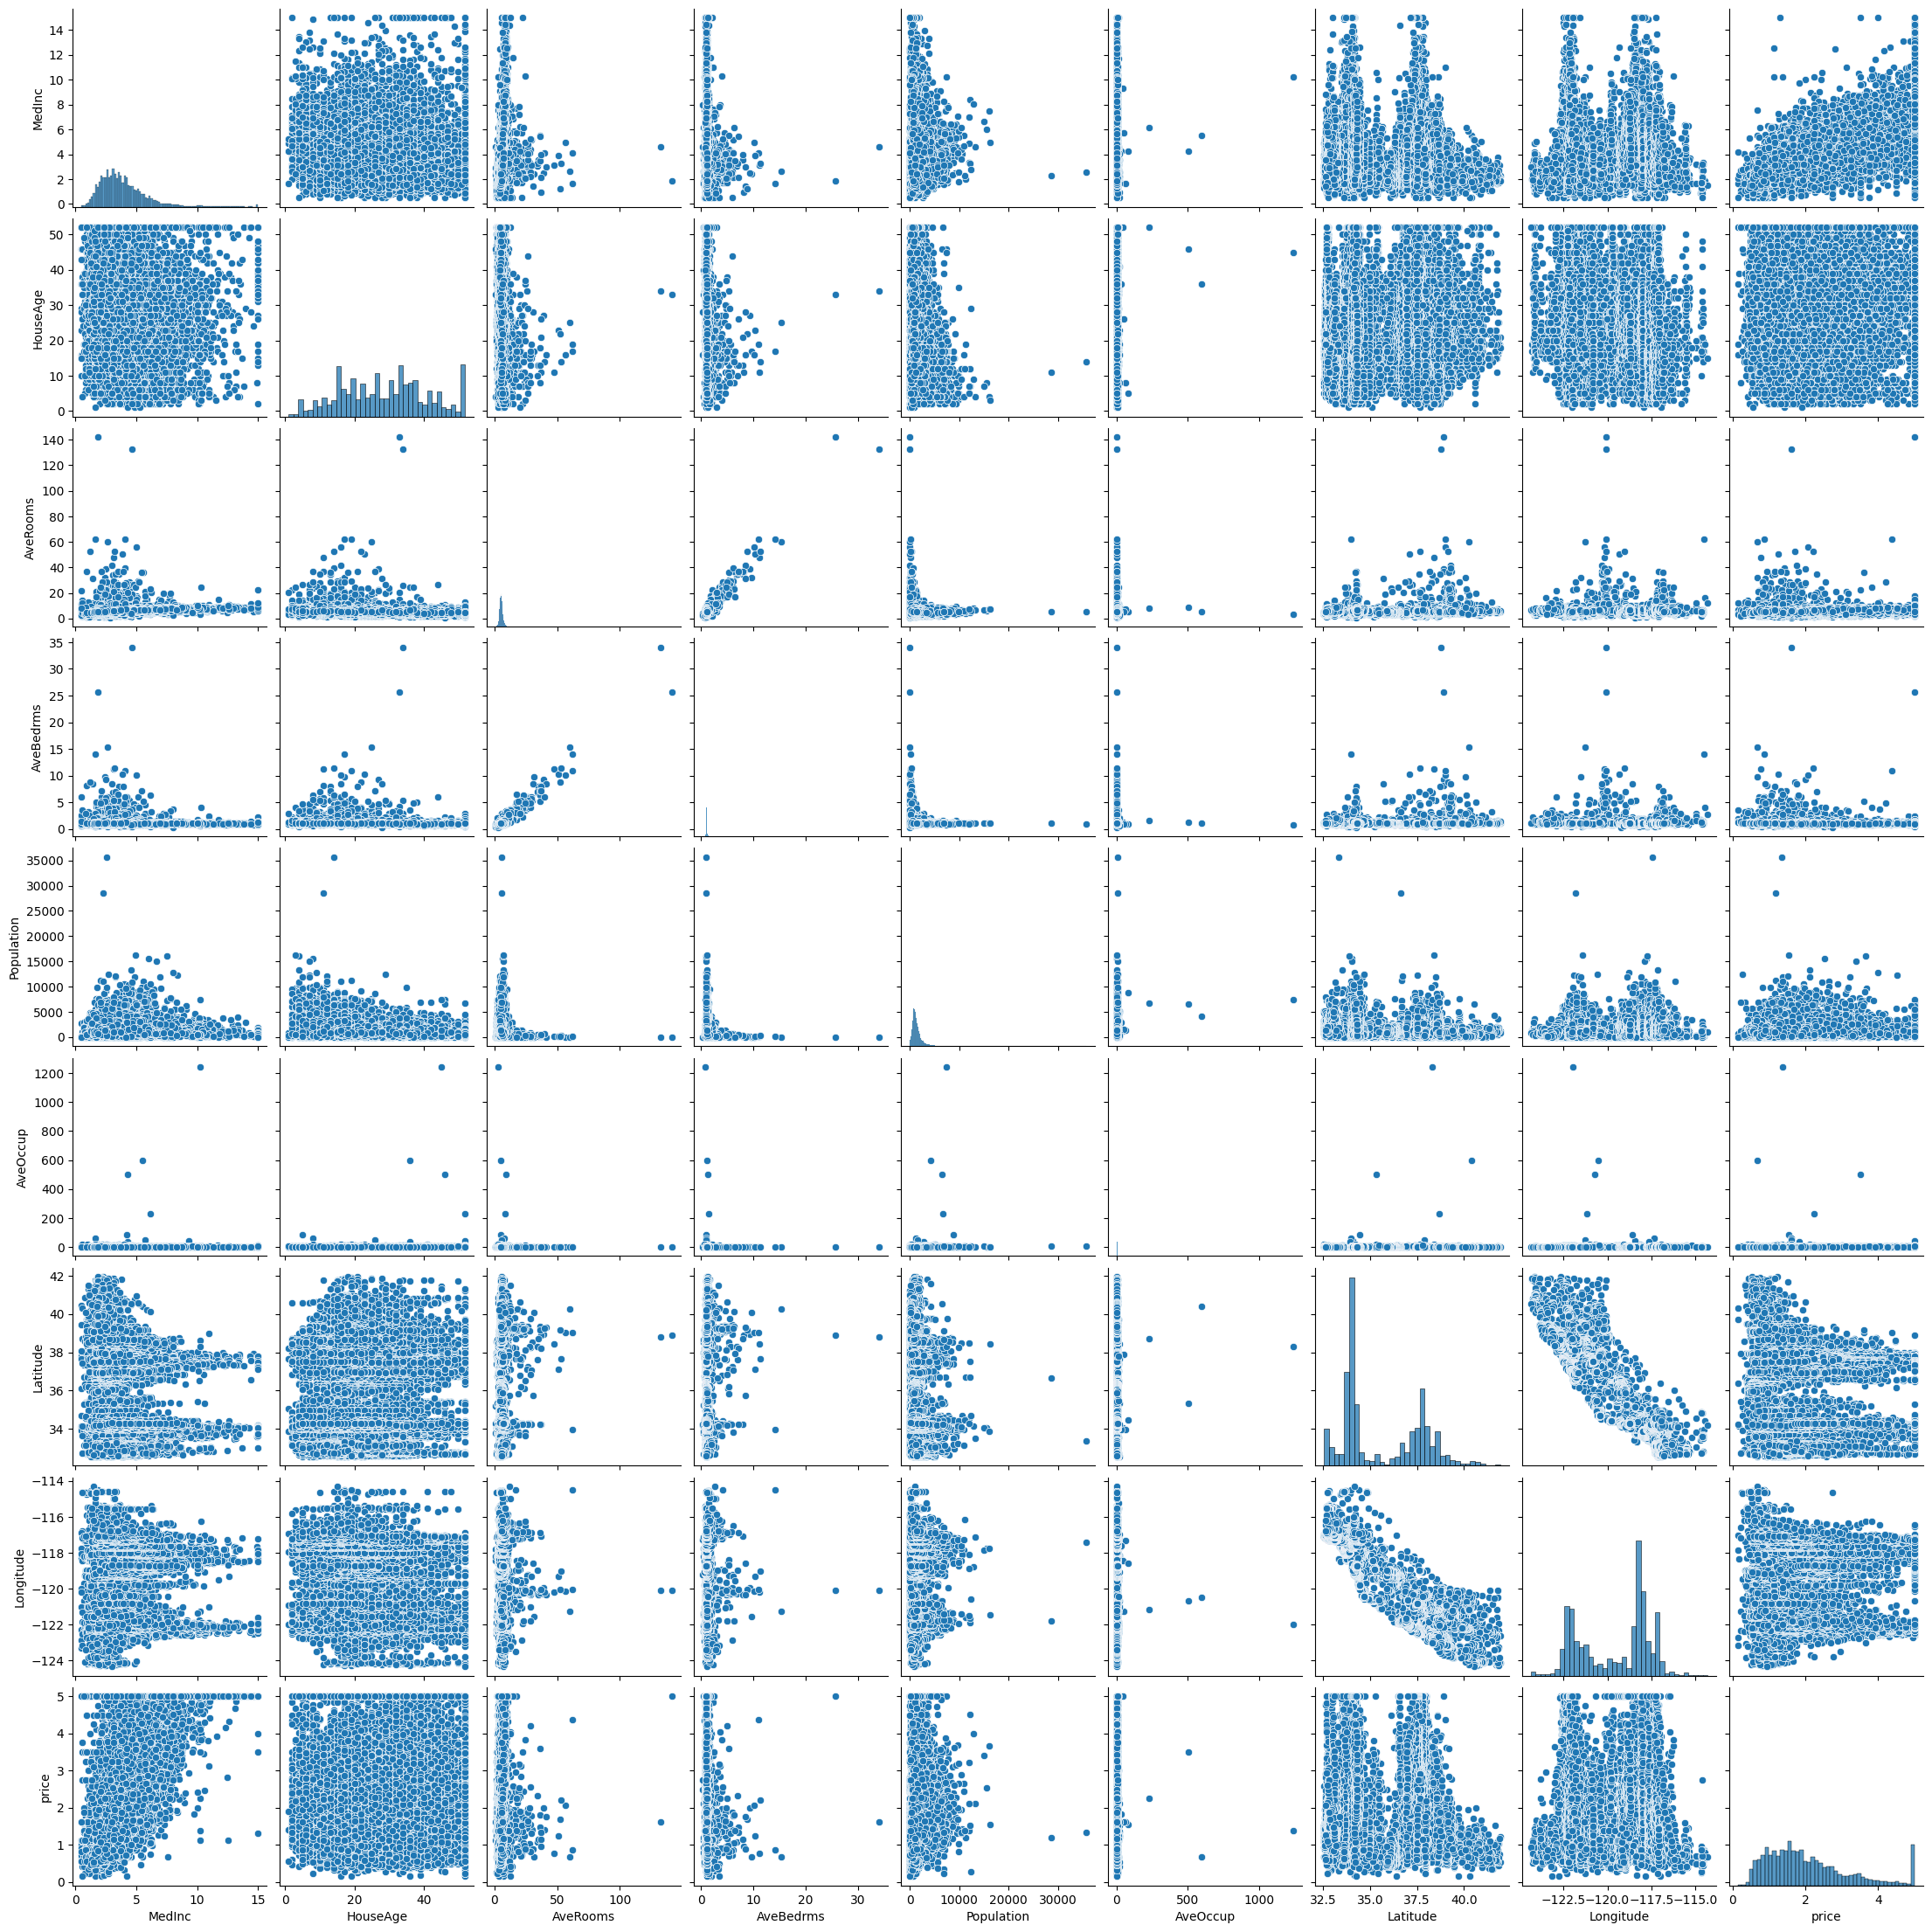

In [81]:
sns.pairplot(dataset)

### 4.2 `Analysing the features`

In [82]:
"""
Attribute Information:
    - MedInc        median income in block group
    - HouseAge      median house age in block group
    - AveRooms      average number of rooms per household
    - AveBedrms     average number of bedrooms per household
    - Population    block group population
    - AveOccup      average number of household members
    - Latitude      block group latitude
    - Longitude     block group longitude

"""

'\nAttribute Information:\n    - MedInc        median income in block group\n    - HouseAge      median house age in block group\n    - AveRooms      average number of rooms per household\n    - AveBedrms     average number of bedrooms per household\n    - Population    block group population\n    - AveOccup      average number of household members\n    - Latitude      block group latitude\n    - Longitude     block group longitude\n\n'

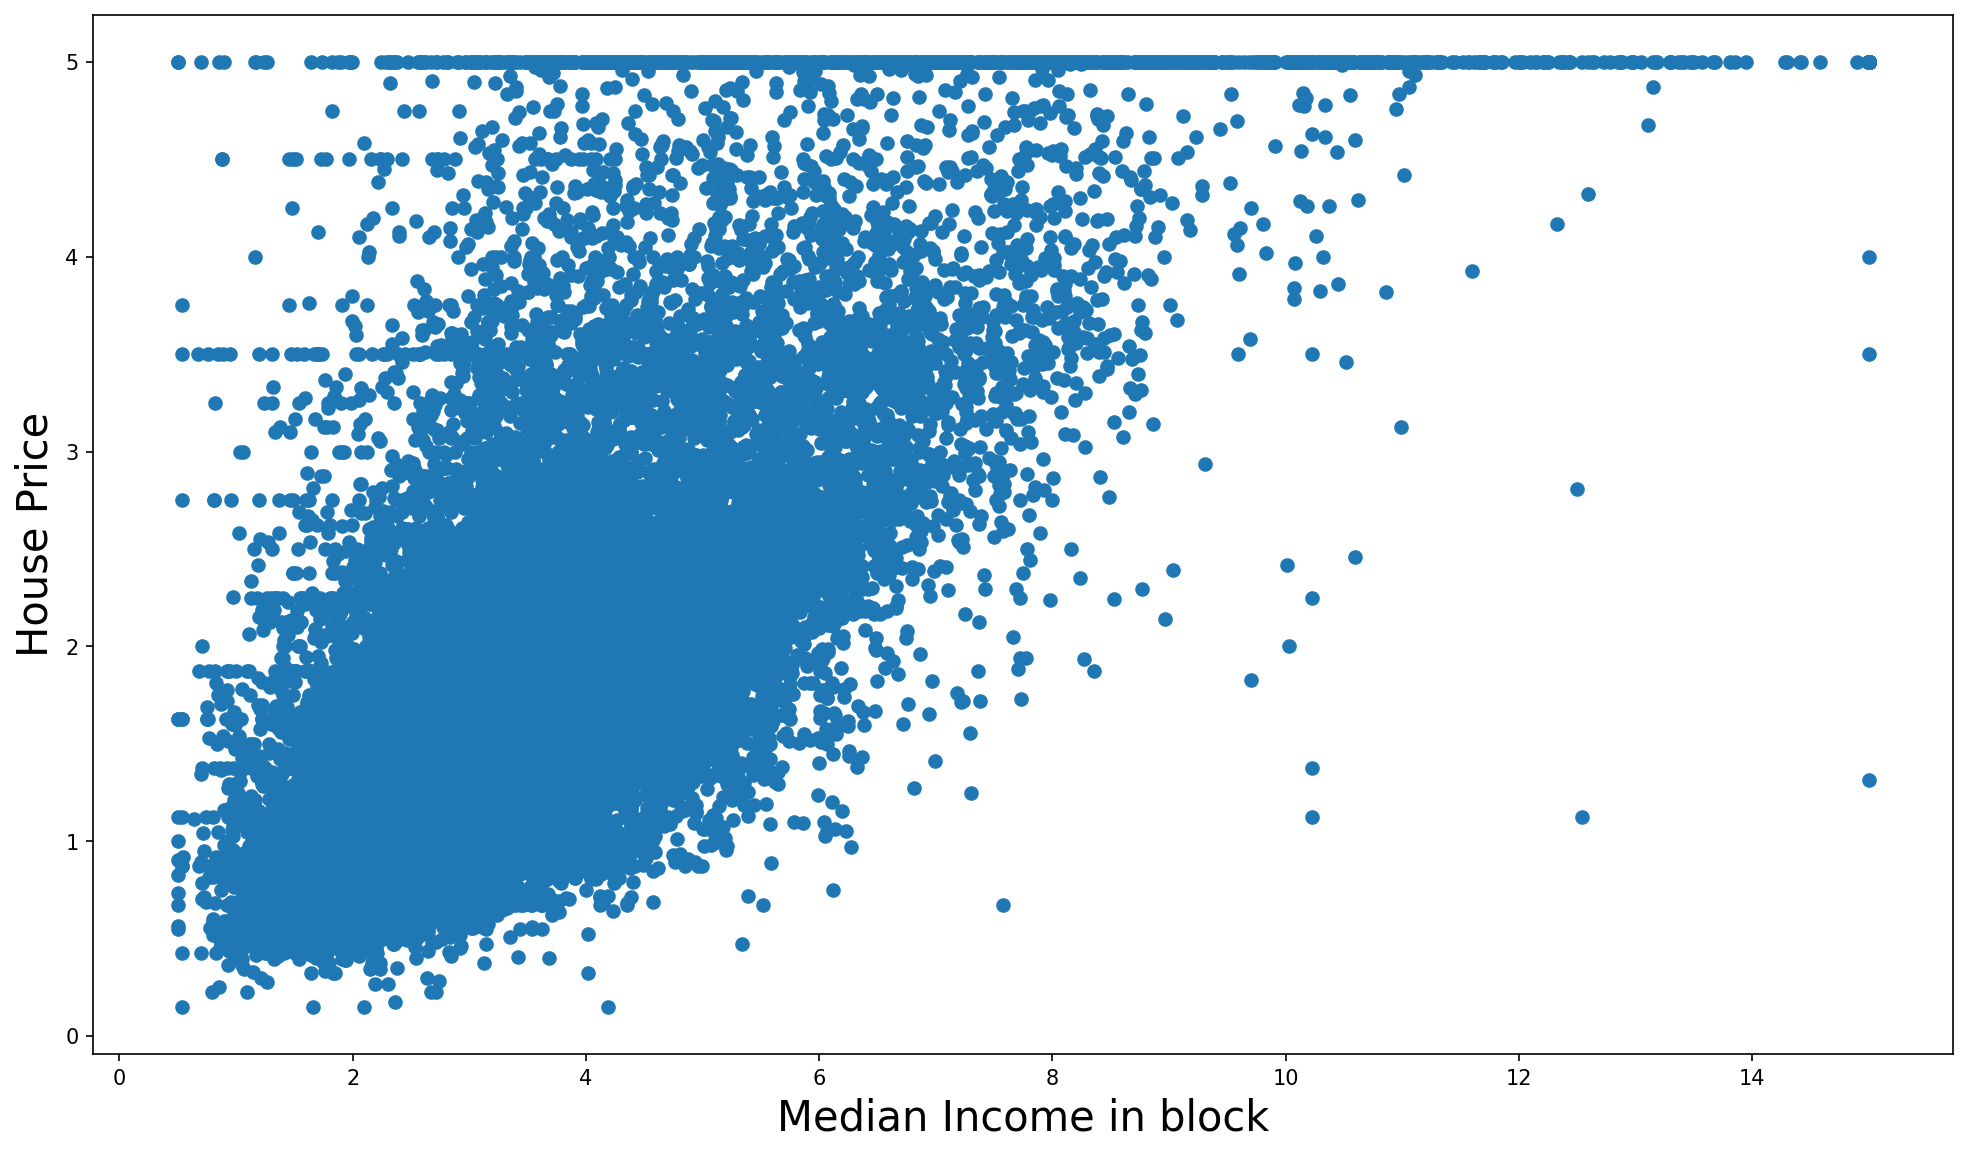

In [83]:
plt.figure(figsize=(16,9),dpi=150)
plt.scatter(dataset["MedInc"],dataset['price'])
plt.xlabel("Median Income in block",fontsize=20)
plt.ylabel("House Price",fontsize=20)
plt.show()

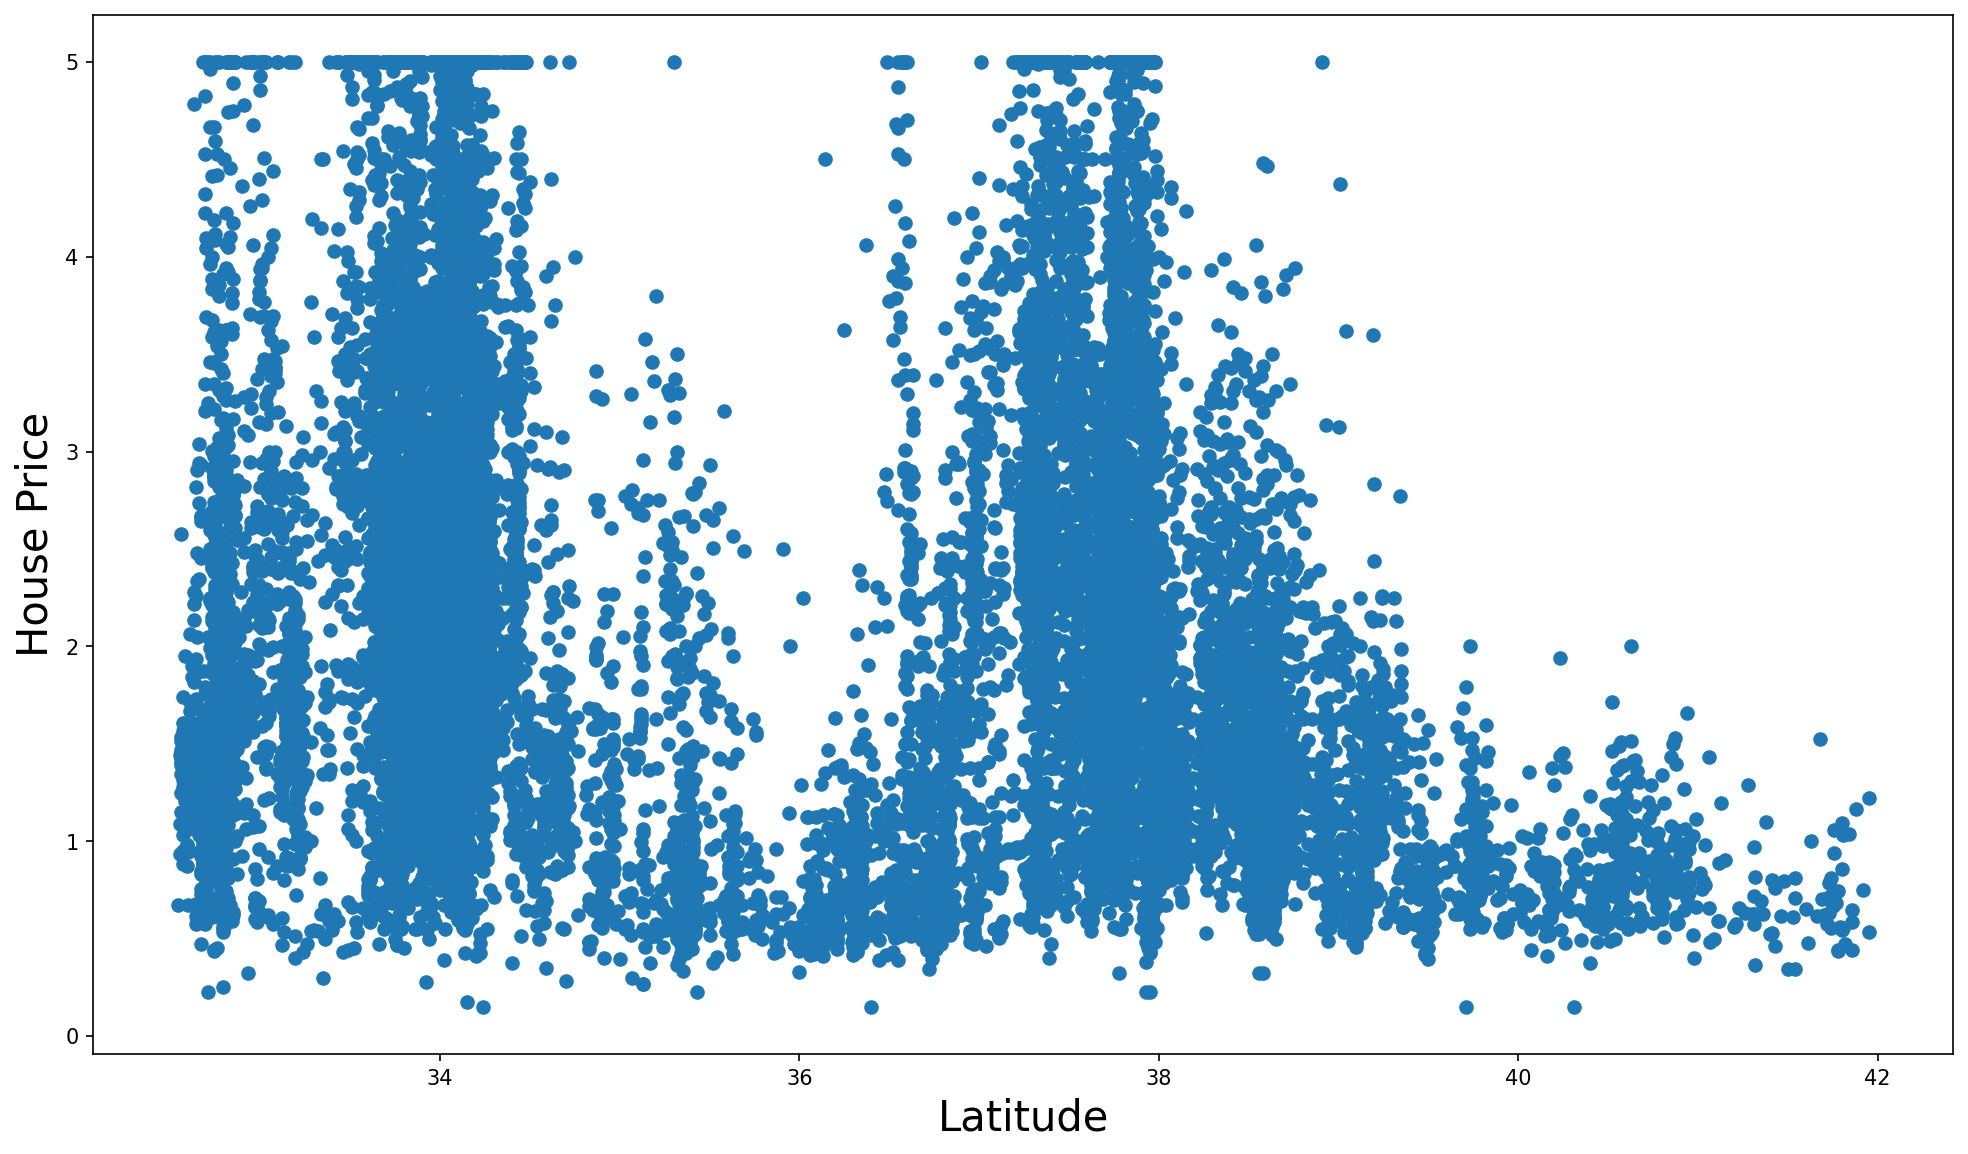

In [84]:
plt.figure(figsize=(16,9),dpi=150)
plt.scatter(dataset["Latitude"],dataset['price'])
plt.xlabel("Latitude",fontsize=20)
plt.ylabel("House Price",fontsize=20)
plt.show()

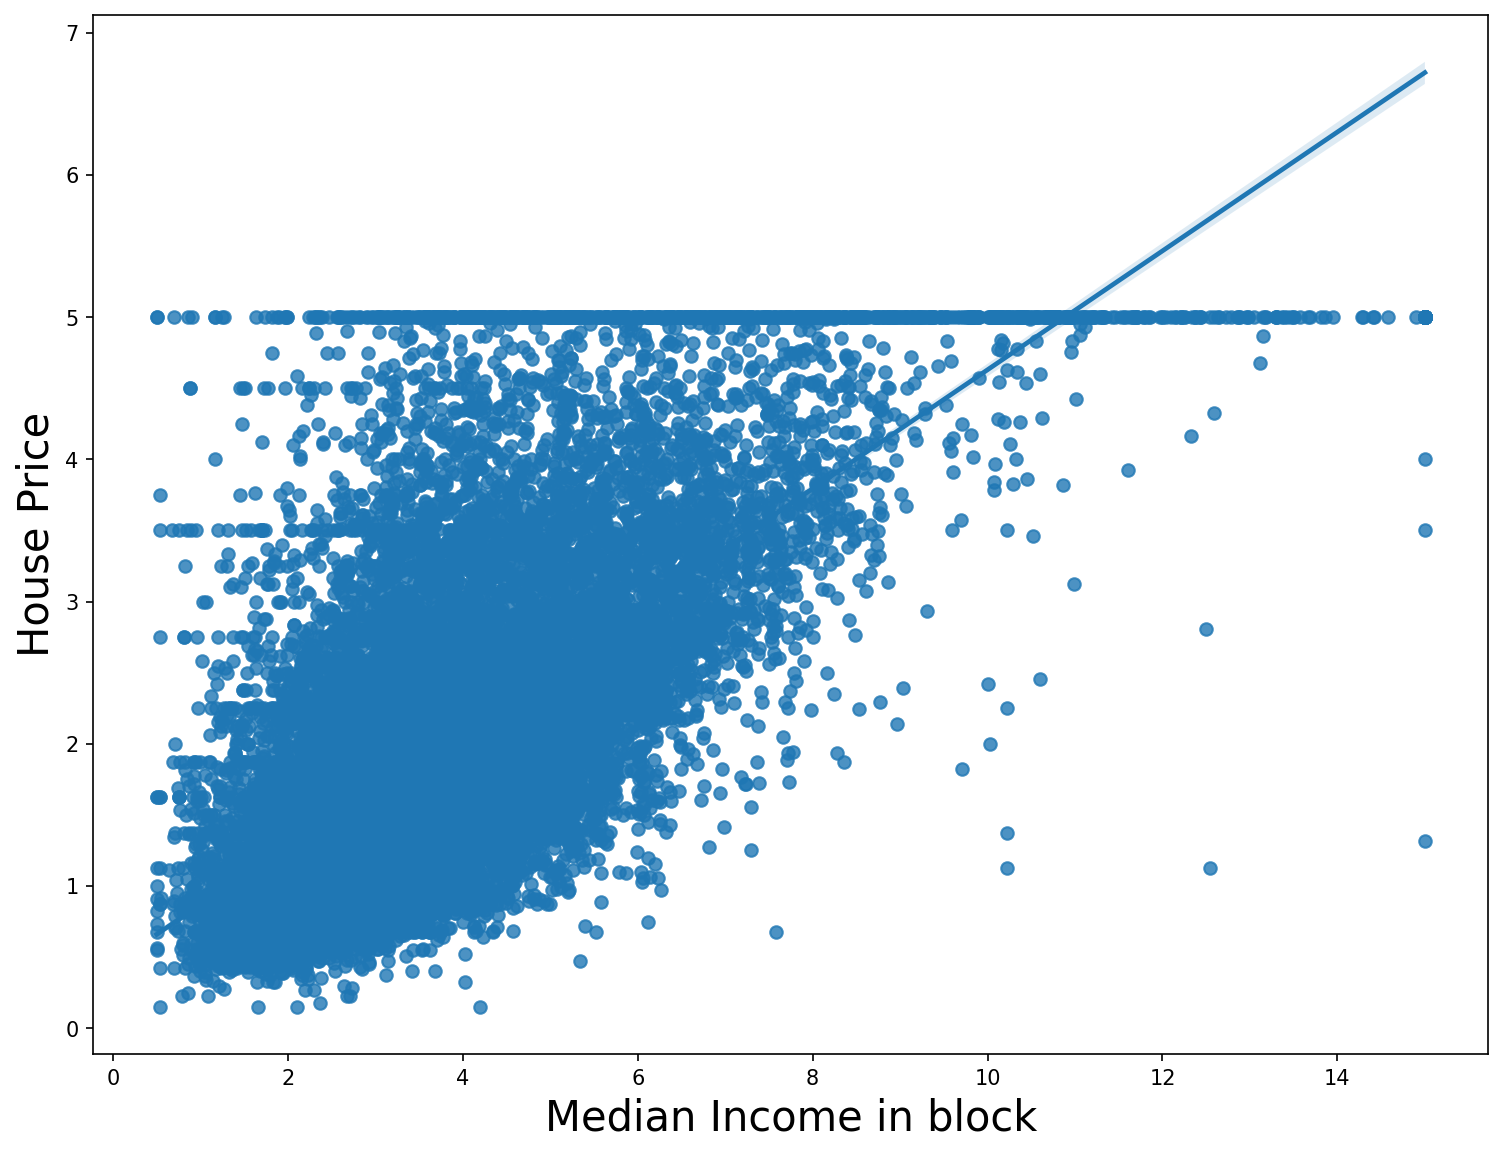

In [85]:
plt.figure(figsize=(12,9),dpi=150)
sns.regplot(x="MedInc",y="price",data=dataset)
plt.xlabel("Median Income in block",fontsize=20)
plt.ylabel("House Price",fontsize=20)
plt.show()

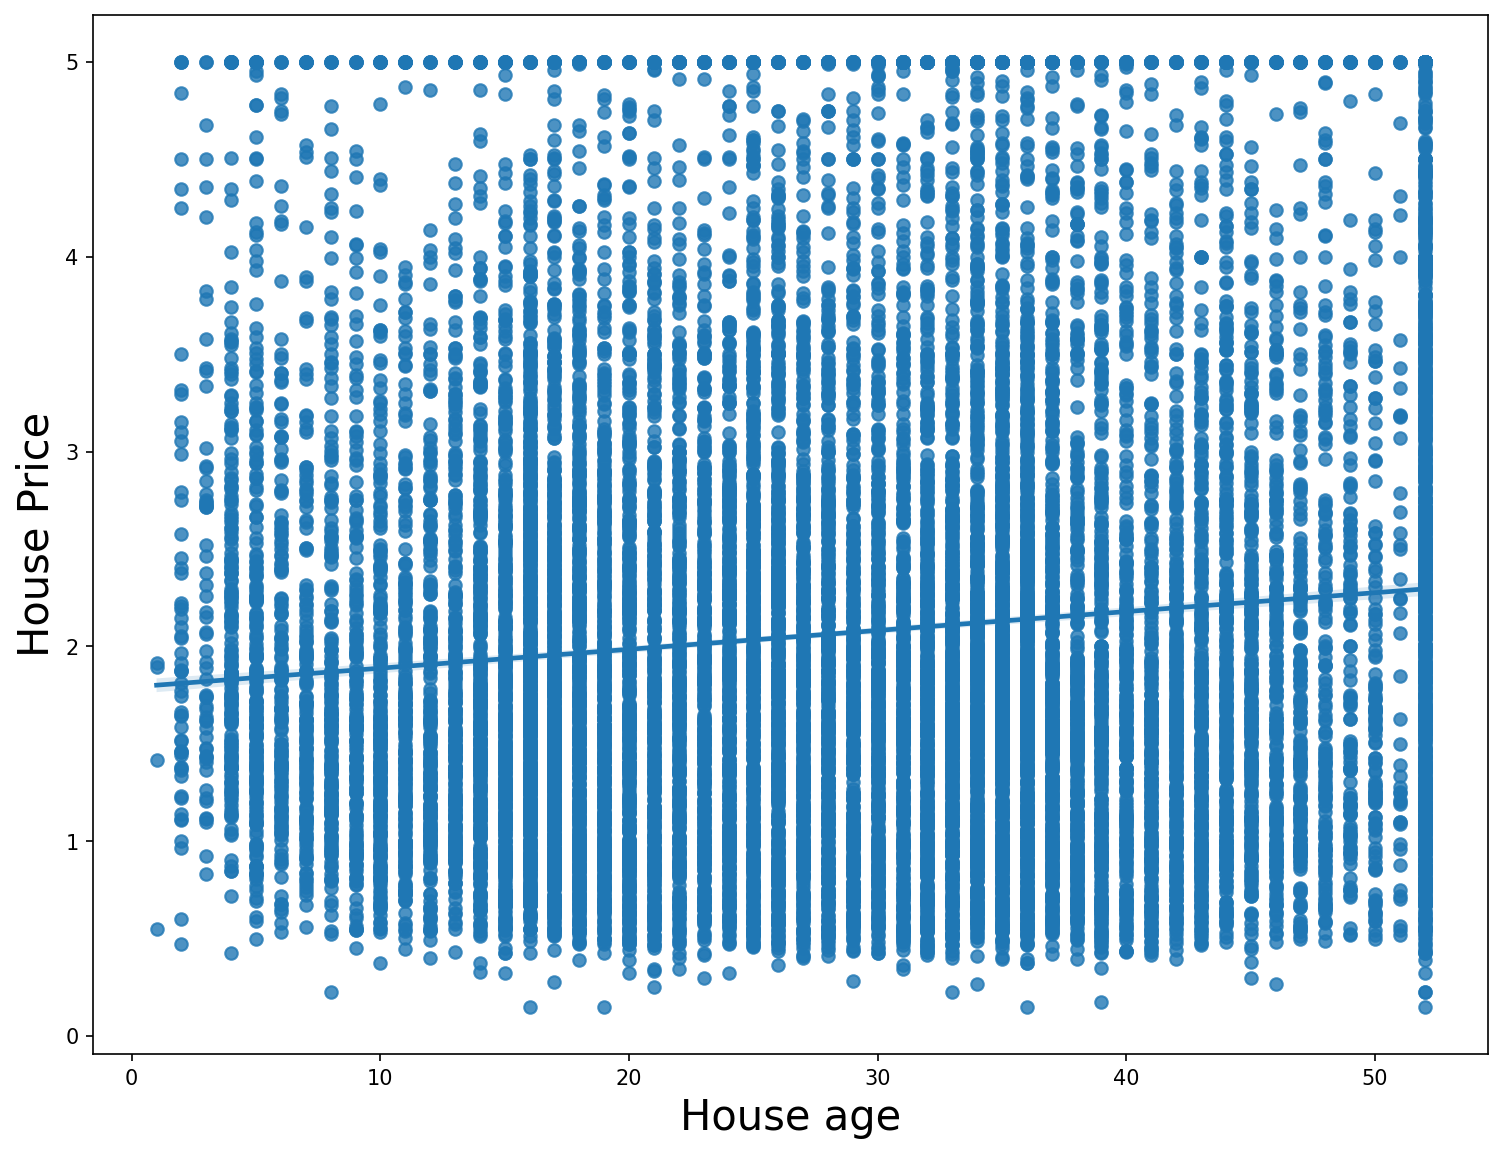

In [86]:
plt.figure(figsize=(12,9),dpi=150)
sns.regplot(x="HouseAge",y="price",data=dataset)
plt.xlabel("House age",fontsize=20)
plt.ylabel("House Price",fontsize=20)
plt.show()

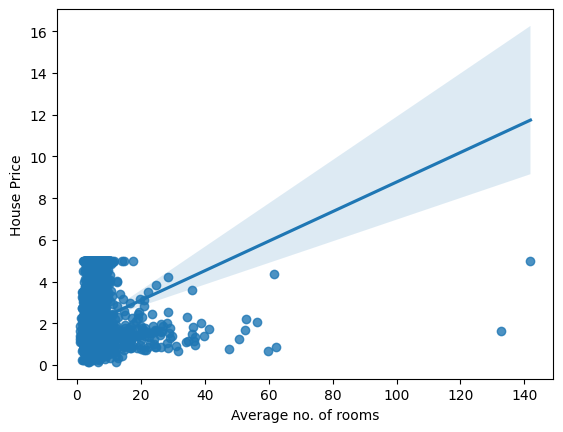

In [87]:
sns.regplot(x="AveRooms",y="price",data=dataset)
plt.xlabel("Average no. of rooms")
plt.ylabel("House Price")
plt.show()

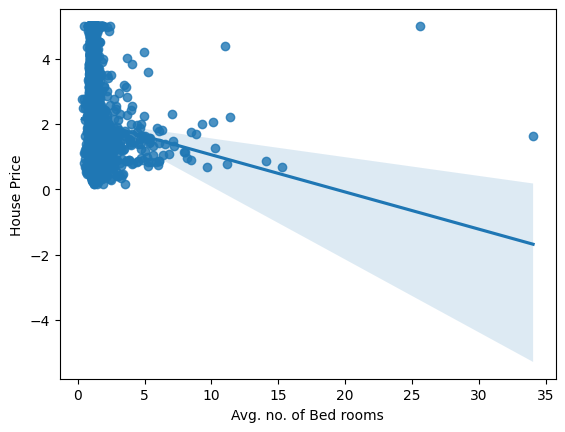

In [88]:
sns.regplot(x="AveBedrms",y="price",data=dataset)
plt.xlabel("Avg. no. of Bed rooms")
plt.ylabel("House Price")
plt.show()

## 5 `Dividing Features`

In [89]:
X = dataset.iloc[: , :-1]
y = dataset.iloc[: ,-1]

In [90]:
X

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25
...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32


### 5.1 `Train Test Split`

In [91]:
from sklearn.model_selection import train_test_split

In [92]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state = 42)

### 5.2 `Standardizing the data`

`need:` All the independent features may have different scaling units as they represent a different parameter so to reach the gloobal minima in the gradient descent more effectively we have to scale them down into smae units

In [93]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [94]:
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

## 6 `Model Training and Prediction`

### `Linear Regression`

In [95]:
from sklearn.linear_model import LinearRegression

In [96]:
regression = LinearRegression()
regression = regression.fit(X_train,y_train)
regression

LinearRegression()

### 6.1 `Coefficients and the Intercept`

In [97]:
print(regression.coef_)

[ 8.49221760e-01  1.22119309e-01 -2.99558449e-01  3.48409673e-01
 -8.84488134e-04 -4.16980388e-02 -8.93855649e-01 -8.68616688e-01]


In [98]:
print(regression.intercept_)

2.0692396089424165


In [99]:
print(regression.get_params())

{'copy_X': True, 'fit_intercept': True, 'n_jobs': None, 'positive': False}


### 6.2 `Predictions`

In [100]:
reg_pred = regression.predict(X_test)
reg_pred

array([0.72604907, 1.76743383, 2.71092161, ..., 2.07465531, 1.57371395,
       1.82744133])

### 6.3 `Comparing the Predictions`

#### `Ploting scatter plot`

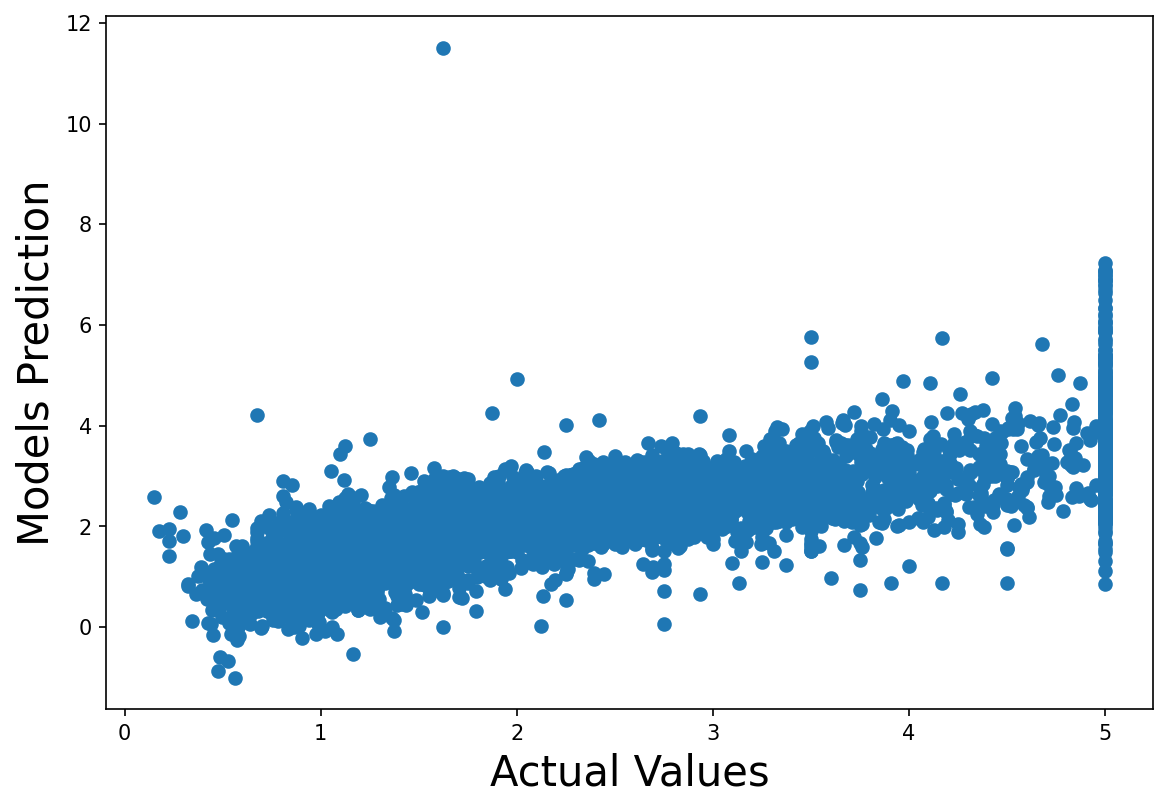

In [101]:
plt.figure(figsize = (9,6),dpi=(150))
plt.scatter(y_test,reg_pred)
plt.ylabel("Models Prediction", fontsize = 20)
plt.xlabel("Actual Values",fontsize=20)
plt.show()

### 6.4 `Residuals`

In [102]:
residuals = y_test-reg_pred

In [103]:
residuals

20046   -0.249049
3024    -1.309434
15663    2.289088
20484   -0.649147
9814     0.173042
           ...   
17505    0.155059
13512   -0.237516
10842    0.109345
16559   -0.379714
5786     0.270559
Name: price, Length: 6192, dtype: float64

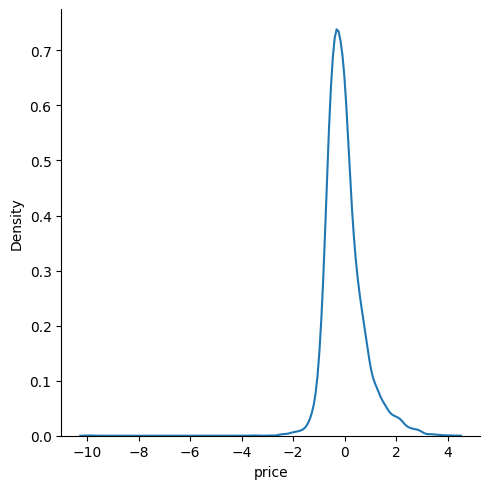

In [104]:
sns.displot(residuals,kind = "kde")
plt.show()

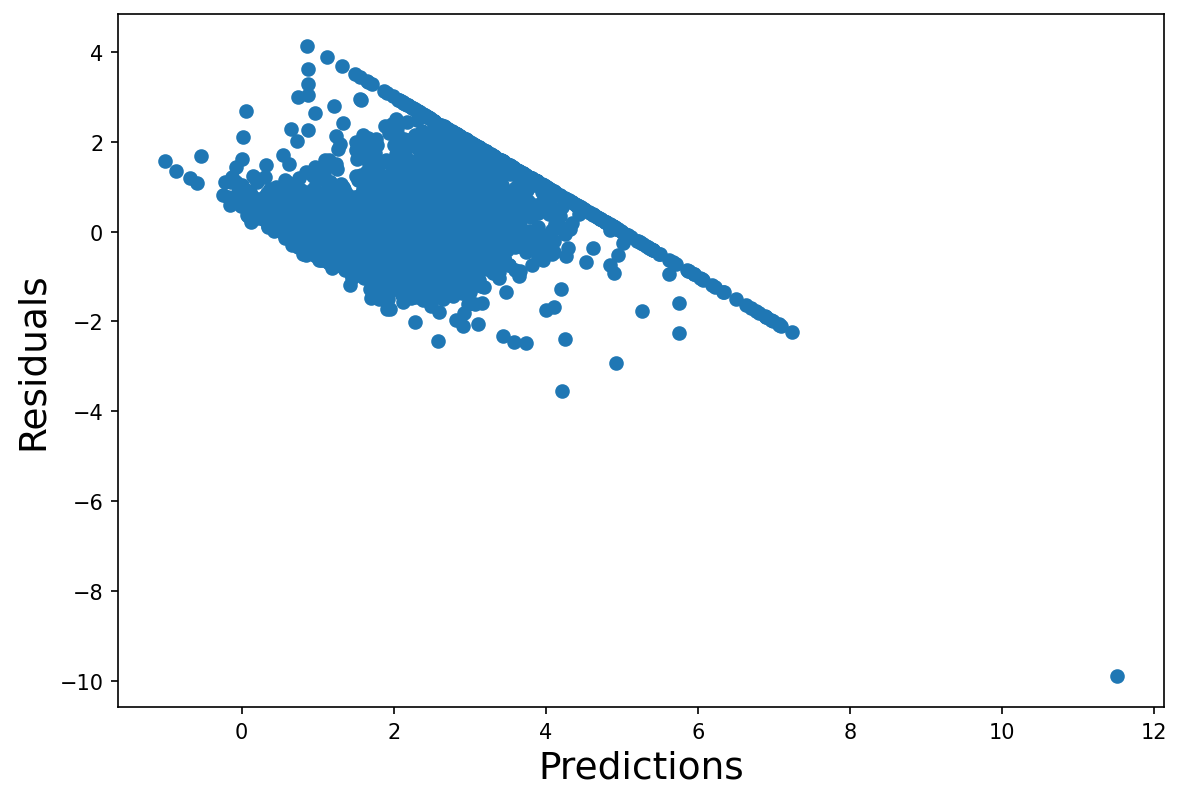

In [105]:
plt.figure(figsize = (9,6),dpi=(150))
plt.scatter(reg_pred,residuals)
plt.ylabel("Residuals", fontsize = 18)
plt.xlabel("Predictions",fontsize=18)
plt.show()


## Must have Uniform distribution

### 6.5 `Performence Metrices for Linear Regression`

*   List item
*   List item


1. Mean Square Error
2. Mean Absolute Error
3. Root Mean Square Error
4. R square and Adjusted R square

In [106]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

print(mean_squared_error(reg_pred,y_test))
print(mean_absolute_error(reg_pred,y_test))

## root mean sq error
root_mean_squared_error = np.sqrt(mean_squared_error(y_test,reg_pred))
print(root_mean_squared_error)

0.5305677824766752
0.5272474538305952
0.7284008391515452


In [107]:
# R^2 :

In [108]:
from sklearn.metrics import r2_score
r2score = r2_score(y_test,reg_pred)
r2score

0.5957702326061665

In [109]:
# Adjusted R^2 :
1-(1-r2score)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)

0.5952472117200027

### 6.6 `New Data Prediciton`

In [110]:
california.data[0].reshape(1,-1).shape

(1, 8)

In [143]:
scaler0= scaler.transform(california.data[0].reshape(1,-1))
# scaler0

C:\Users\Vipin Vashisth\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([[ 2.33526315,  0.98504972,  0.63012521, -0.16586931, -0.96995366,
        -0.04555657,  1.04385626, -1.32105914]])

In [112]:
regression.predict(scaler0)

array([4.14333441])

### 6.7 `Saving the model for deployment`

In [113]:
import pickle
pickle.dump(regression,open(r"C:\Users\Vipin Vashisth\Desktop\ML_Projects\california_house_price\regmodel.pkl",'wb'))

In [114]:
pickle_model = pickle.load(open(r'C:\Users\Vipin Vashisth\Desktop\ML_Projects\california_house_price\regmodel.pkl',"rb"))

In [115]:
pickle_model.predict(scaler0)

array([4.14333441])

## 7 `Model Training and prediction for Polynomial Regression`

In [116]:
# Polynomial Regression
from sklearn.preprocessing import PolynomialFeatures

In [132]:
poly_converter = PolynomialFeatures(degree=2,include_bias = False)

### 7.1  `Model Training and Performence Metrices`

In [133]:
train_rmse_errors=[]
test_rmse_errors=[]
train_r2_score=[]
test_r2_score=[]
for d in range(2,3):

    polynomial_converter = PolynomialFeatures(degree=d,include_bias=False)
    poly_features = polynomial_converter.fit_transform(X)

    X_train, X_test, y_train, y_test = train_test_split(poly_features, y,test_size=0.3, random_state=42)

    model = LinearRegression(fit_intercept=True)
    model.fit(X_train,y_train)


    train_pred = model.predict(X_train)
    test_pred = model.predict(X_test)


    train_RMSE = np.sqrt(mean_squared_error(y_train,train_pred))


    test_RMSE = np.sqrt(mean_squared_error(y_test,test_pred))

    train_r2= r2_score(y_train,train_pred)

    test_r2 = r2_score(y_test,test_pred)




    train_rmse_errors.append(train_RMSE)
    test_rmse_errors.append(test_RMSE)
    train_r2_score.append(train_r2)
    test_r2_score.append(test_r2)


In [134]:
train_rmse_errors

[np.float64(0.6508463314463697)]

In [135]:
test_rmse_errors

[np.float64(0.6745163732426744)]

In [136]:
train_r2_score

[0.6838081517893662]

In [137]:
test_r2_score

[0.6533650019044048]

In [138]:
highest_r2_score=max(test_r2_score)
highest_r2_score

0.6533650019044048

### 7.2 `Variation of R^2 square and Degree of Model`

### 7.3 `New Data Prediction`

In [139]:
california.data[0].reshape(1,-1).shape

(1, 8)

In [142]:
scaler1 = polynomial_converter.transform(california.data[0].reshape(1,-1))
scaler1

C:\Users\Vipin Vashisth\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(


array([[ 8.32520000e+00,  4.10000000e+01,  6.98412698e+00,
         1.02380952e+00,  3.22000000e+02,  2.55555556e+00,
         3.78800000e+01, -1.22230000e+02,  6.93089550e+01,
         3.41333200e+02,  5.81442540e+01,  8.52341905e+00,
         2.68071440e+03,  2.12755111e+01,  3.15358576e+02,
        -1.01758920e+03,  1.68100000e+03,  2.86349206e+02,
         4.19761905e+01,  1.32020000e+04,  1.04777778e+02,
         1.55308000e+03, -5.01143000e+03,  4.87780297e+01,
         7.15041572e+00,  2.24888889e+03,  1.78483245e+01,
         2.64558730e+02, -8.53669841e+02,  1.04818594e+00,
         3.29666667e+02,  2.61640212e+00,  3.87819048e+01,
        -1.25140238e+02,  1.03684000e+05,  8.22888889e+02,
         1.21973600e+04, -3.93580600e+04,  6.53086420e+00,
         9.68044444e+01, -3.12365556e+02,  1.43489440e+03,
        -4.63007240e+03,  1.49401729e+04]])

In [144]:
with open('scaling.pkl', 'wb') as f:
    pickle.dump(scaler, f)

with open('polynomial_converter.pkl', 'wb') as f:
    pickle.dump(polynomial_converter, f)

print("Scaler and polynomial features converter saved successfully!")

Scaler and polynomial features converter saved successfully!


In [127]:
model.predict(scaler1)

array([4.01481027])

In [128]:
pickle.dump((model),open(r"C:\Users\Vipin Vashisth\Desktop\ML_Projects\california_house_price\poly_regmodel.pkl",'wb'))

In [129]:
poly_model = pickle.load(open(r'C:\Users\Vipin Vashisth\Desktop\ML_Projects\california_house_price\poly_regmodel.pkl',"rb"))
# poly_model

In [130]:
poly_model.predict(scaler1)

array([4.01481027])

In [131]:
!python --version 

Python 3.11.9
